In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0.0, 100.0, size=100)
X[:,1] = 0.75 * X[:,0] + 3.0 + np.random.normal(0, 10.0, size=100)

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)
X = demean(X)

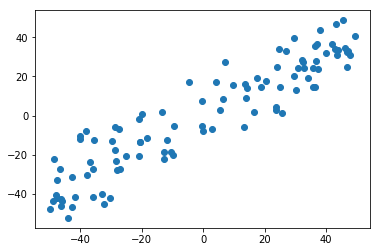

In [5]:
plt.scatter(X[:,0], X[:,1])

In [6]:
def f(w, X):
    return np.sum(X.dot(w)**2)  / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)    ## 注意1:每次求一个单位方向向量
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w

In [8]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77096107, 0.63688228])

In [17]:
### 求第二主成分
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

'''
X2向量化
X2 = X - X.dot(w).reshape(-1, 1) * w

X.dot(w).reshape(-1, 1) * w
矩阵X_project
每一行对应的是原来X中的每一行映射到w轴上对应的向量
'''

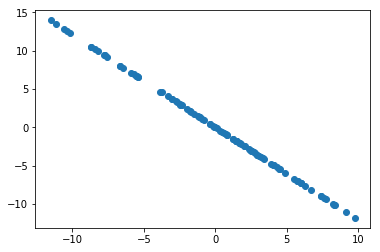

In [12]:
plt.scatter(X2[:,0], X2[:, 1])

In [14]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.63688463, -0.77095912])

In [16]:
### w*w2≈0
w.dot(w2)

3.056433752757215e-06

In [26]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [27]:
first_n_components(2, X)

[array([0.77096102, 0.63688233]), array([-0.63687799,  0.7709646 ])]